# Pymaceuticals Inc.
---

### Analysis

-We can see that the weight affects the effectiveness of the medications.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_set=pd.merge(mouse_metadata, study_results,how="left",on="Mouse ID")

# Display the data table for preview
data_set.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [25]:
# Checking the number of mice.
mice_number=len(data_set["Mouse ID"].unique())
mice_number


249

In [26]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=data_set.loc[data_set.duplicated(subset=["Mouse ID", "Timepoint"]),'Mouse ID'].unique()

#print("Duplicate Rows based on Mouse ID and Timepoint : ")
duplicate_mice

array(['g989'], dtype=object)

In [27]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ID=data_set[data_set.duplicated(["Mouse ID"])]
duplicate_mouse_ID.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_data=data_set.drop_duplicates(subset=["Mouse ID"])
#clean_data.head()
clean_data=data_set[data_set['Mouse ID'].isin(duplicate_mice)==False]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [29]:
# Checking the number of mice in the clean DataFrame.
clean_mice=len(clean_data["Mouse ID"].unique())
clean_mice

248

## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume=data_set.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor_volume=data_set.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance_tumor_volume=data_set.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
st.dev_tumor_volume=data_set.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_tumor_volume=data_set.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics=pd.DataFrame({" Mean Tumor Volume " : mean_tumor_volume,
                                 "Median Tumor Volume" : median_tumor_volume,
                                 " Tumor Volume Variance " : variance_tumor_volume,
                                 " Tumor Volume Std. Dev " : st.dev_tumor_volume,
                                 " Tumor Volume Std. Err. " : sem_tumor_volume})

summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
mean=data_set.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median=data_set.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance=data_set.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
st.dev=data_set.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem=data_set.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Using the aggregation method, produce the same summary statistics in a single line.
Summary_statis=data_set.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean", "median","var","std","sem"] })
Summary_statis


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

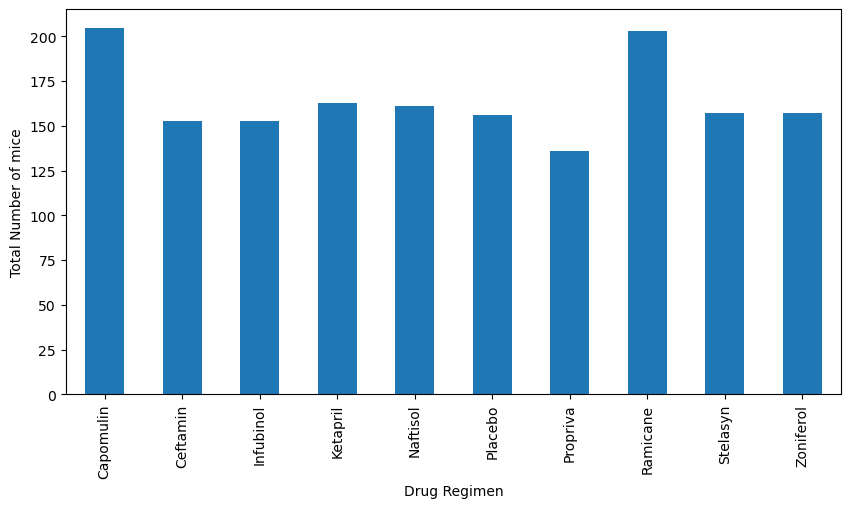

<Figure size 640x480 with 0 Axes>

In [32]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen=duplicate_mouse_ID.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen.plot(kind="bar", figsize=(10,5))
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of mice")
plt.show()
plt.tight_layout()

In [33]:
import numpy as np

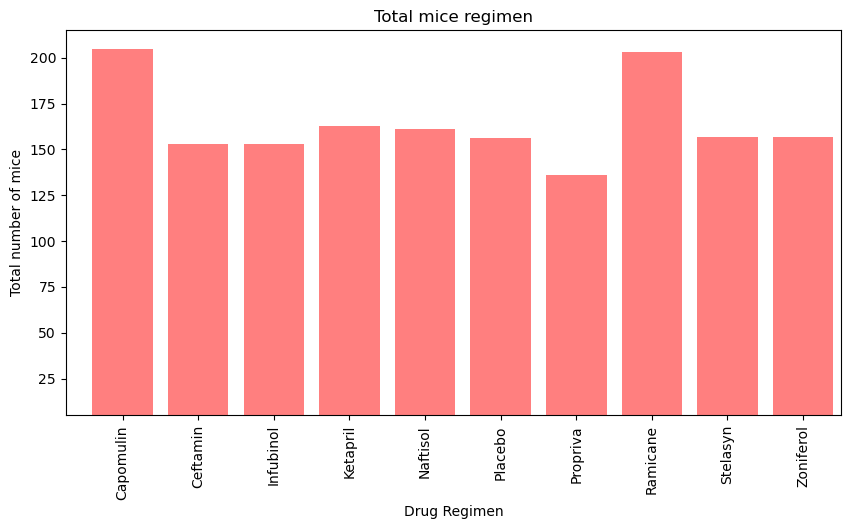

In [34]:
# Generate a bar plot showing the total number of timepoints for all mice testeor each drug regimen using pyplot.

x_axis=np.arange(len(regimen))
tick_locations=[value for value in x_axis]

plt.figure(figsize=(10,5))
plt.bar(x_axis,regimen, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, regimen.index.values, rotation="vertical")

#Set x and y limits
plt.xlim(-0.75, len(x_axis)-0.50)
plt.ylim(5, max(regimen)+10)

#Titles and labels
plt.title("Total mice regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of mice")

#plt.tight_layout()
plt.show()



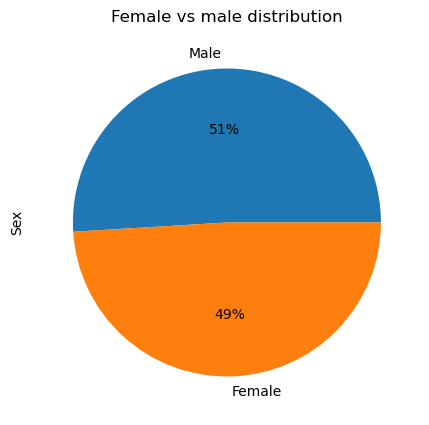

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
distribution=clean_data.Sex.value_counts()
colors=['blue','orange']
distribution.plot(kind="pie",autopct='%1.0f%%', figsize=(10,5))
plt.title("Female vs male distribution")
plt.show()


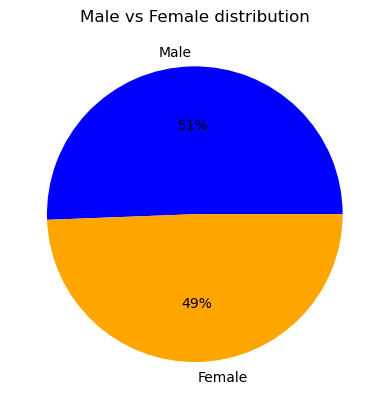

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_distribution=data_set.Sex.value_counts()
plt.title("Male vs Female distribution")
colors=["blue","orange"]
labels=["Male","Female"]
plt.pie(sex_distribution,labels=labels,autopct="%1.0f%%",colors=colors)
plt.show()


## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatment=['Capomulin', 'Ramicane','Infubinol', 'Ceftamin']
tumor_vol=[]
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint=pd.DataFrame(data_set.groupby('Mouse ID')["Timepoint"].max().sort_values())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_group=pd.merge(data_set,greatest_timepoint, on="Mouse ID")
merge_group.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


## Line and Scatter Plots

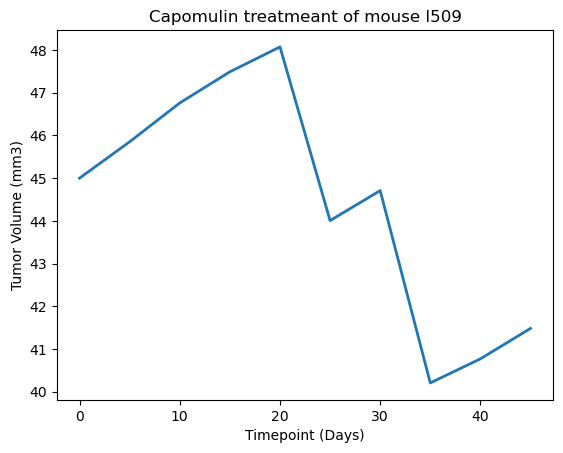

In [38]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot = clean_data.loc[clean_data["Mouse ID"] == "l509",:]
line_plot

x_axisTP = line_plot["Timepoint"] 
tumor_size = line_plot["Tumor Volume (mm3)"]
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axisTP, tumor_size,linewidth=2, markersize=5) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

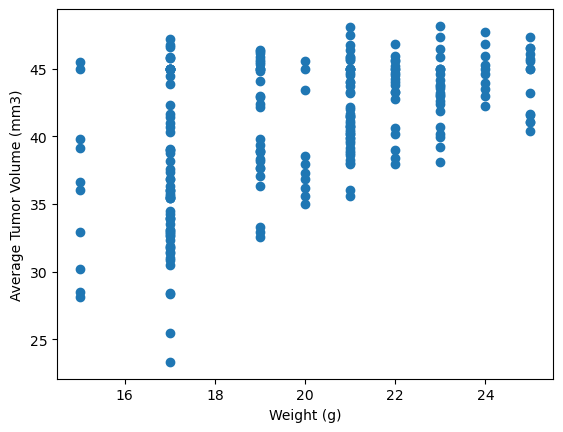

In [39]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_plot=clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
capomulin=scatter_plot.groupby(['Mouse ID']).mean()

plt.scatter(scatter_plot['Weight (g)'],scatter_plot['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


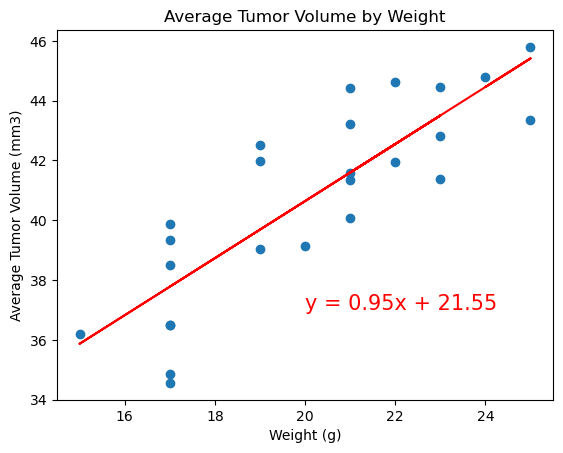

In [40]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Duplicate code for scatter plot from above:

capomulin = data_set.loc[data_set['Drug Regimen'] == 'Capomulin']
avg_vol= pd.DataFrame(capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol= pd.merge(capomulin_df, avg_vol, on='Mouse ID')
final_avg_vol= avg_vol[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol
x = final_avg_vol['Weight (g)']
y = final_avg_vol['avg_tumor_vol']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()
